In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import *

In [4]:
#загрузка данных
boston = load_boston()
for x in boston:
    print(x)

data
target
feature_names
DESCR
filename


In [10]:
df = pd.DataFrame(data= np.c_[boston['data'], boston['target']], columns= list(boston['feature_names']) + ['target'])

In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Описание содержимого таблицы
Всего представлено 506 объектов
<br><br>
Уровень преступности CRIM на душу населения по городам <br>
Доля ZN жилого участка в зоне для участков площадью более 25 000 кв. футов.<br>
Доля INDUS акров нерозничного бизнеса на город<br>
Манекен CHAS Charles River (= 1, если тракт граничит с рекой; 0 в противном случае)<br>
Концентрация оксидов азота NOX (частей на 10 миллионов)<br>
Среднее количество комнат на жилье<br>
Доля AGE занятых владельцами единиц, построенных до 1940 года<br>
Взвешенные расстояния DIS до пяти центров занятости в Бостоне<br>
RAD индекс доступности радиальных автомагистралей<br>
TAX на полную стоимость налога на недвижимость за 10 000 долларов США<br>
PTRATIO Соотношение учеников и учителей по городам<br>
B 1000(Bk - 0.63)^2, где Bk - это доля чернокожих по городам<br>
LSTAT % более низкий статус населения<br>
target Средняя стоимость домов, занятых владельцами, в 1000 долларов

In [12]:
#Проверим размер датасета
df.shape

(506, 14)

In [13]:
# Список колонок
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [14]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
target - 0


"Пустых" данных обнаружено не было

In [15]:
# Основные статистические характеристки набора данных
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<AxesSubplot:xlabel='TAX', ylabel='RAD'>

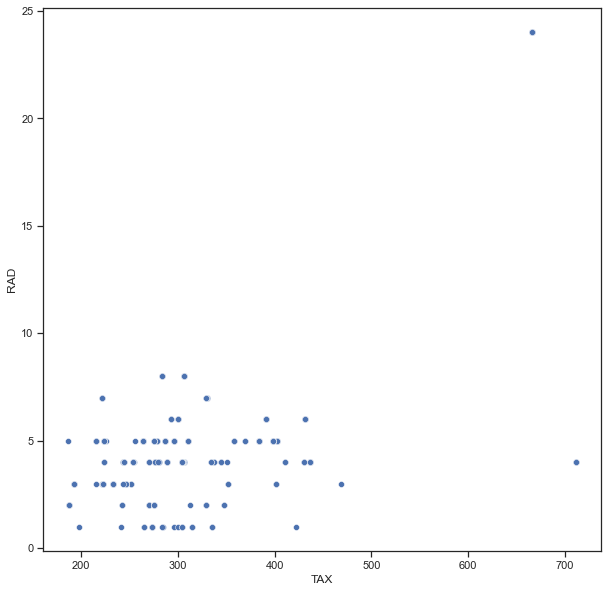

In [28]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='TAX', y='RAD', data=df)

<AxesSubplot:xlabel='target', ylabel='Count'>

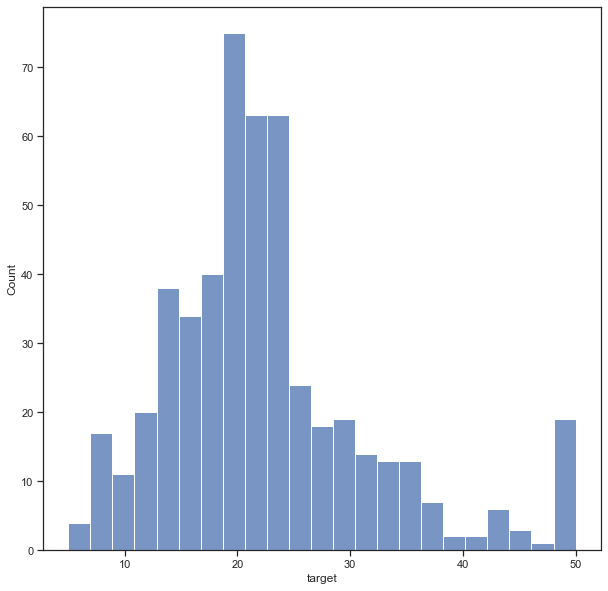

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df['target'])

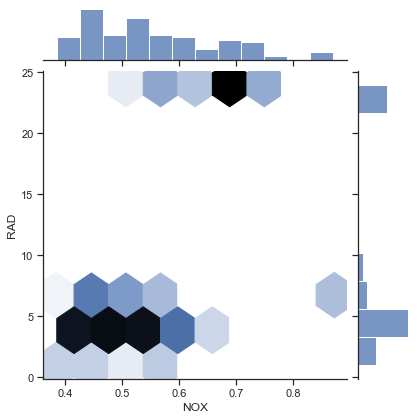

In [27]:
sns.jointplot(x='NOX', y='RAD', data=df, kind="hex")

<AxesSubplot:xlabel='LSTAT'>

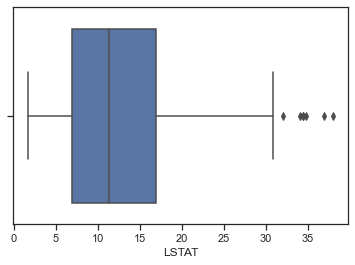

In [24]:
sns.boxplot(x=df['LSTAT'])

<AxesSubplot:>

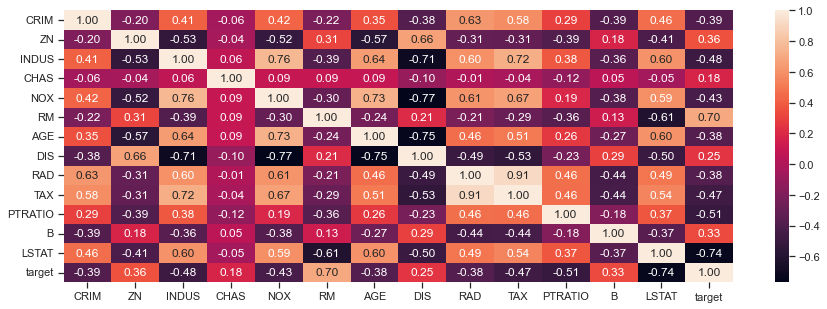

In [35]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')